# Taller: Análisis de Instagram con Apify API + Gemini  
Autor: _(Karol Tatiana Garzón)_  
Fecha de generación: 2025-05-21


**Objetivos**

1. Obtener datos públicos de Instagram usando el actor **`apify/instagram-api-scraper`**.  
2. Limpiar y pre‑procesar captions e información de posts.  
3. Clasificar sentimiento de captions con la API de Google Generative AI (Gemini).  
4. Extraer temas dominantes con LDA y nombrarlos con Gemini.  
5. Segmentar autores o posts según métricas de engagement.  
6. Diseñar una micro‑campaña basada en los insights descubiertos.


In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv

--2025-11-19 23:25:30--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv [following]
--2025-11-19 23:25:30--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18361753 (18M) [text/plain]
Saving to: ‘instagram_posts.csv’

instagram_posts.csv 100%[===================>]  17.51M 

In [2]:
import pandas as pd


In [3]:
!pip install -qU requests pandas google-generativeai nltk seaborn wordcloud scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 66.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [4]:
df = pd.read_csv('instagram_posts.csv')
df.head()

,inputUrl,id,username,url,fullName,biography,externalUrls,externalUrl,externalUrlShimmed,followersCount,...,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationName,locationId,paidPartnership,sponsors
0,https://www.instagram.com/f1/,3637646598679593202,f1,https://www.instagram.com/p/DJ7hE70tIDy/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/f1/,3637494954817152582,f1,https://www.instagram.com/p/DJ6-mOeJuZG/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,f1movie,Original audio,True,False,NaN,1.403914e+15,NaN,NaN,NaN,NaN
2,https://www.instagram.com/f1/,3637535605467005779,f1,https://www.instagram.com/p/DJ7H1xVskNT/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/f1/,3635278159597499148,f1,https://www.instagram.com/p/DJzGjnCi3MM/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/f1/,3637456706674459999,f1,https://www.instagram.com/p/DJ615pHMYVf/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,Monaco,16366456.0,NaN,NaN


In [5]:
df.columns

Index(['inputUrl', 'id', 'username', 'url', 'fullName', 'biography',
       'externalUrls', 'externalUrl', 'externalUrlShimmed', 'followersCount',
       'followsCount', 'hasChannel', 'highlightReelCount', 'isBusinessAccount',
       'joinedRecently', 'businessCategoryName', 'private', 'verified',
       'profilePicUrl', 'profilePicUrlHD', 'igtvVideoCount', 'relatedProfiles',
       'latestIgtvVideos', 'postsCount', 'fbid', 'type', 'shortCode',
       'caption', 'hashtags', 'mentions', 'commentsCount', 'firstComment',
       'latestComments', 'dimensionsHeight', 'dimensionsWidth', 'displayUrl',
       'images', 'alt', 'likesCount', 'timestamp', 'childPosts',
       'ownerFullName', 'ownerUsername', 'ownerId', 'isSponsored',
       'taggedUsers', 'coauthorProducers', 'isCommentsDisabled', 'videoUrl',
       'videoViewCount', 'videoPlayCount', 'productType', 'videoDuration',
       'isPinned', 'musicInfo.artist_name', 'musicInfo.song_name',
       'musicInfo.uses_original_audio', 'musicI


### 🔍 Preguntas – Sección 1 (Exploración)

1. ¿Cuántos posts hay en total?  
2. ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?  
3. ¿Cuál es el rango de fechas cubierto por los posts?  
4. ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?


In [6]:
df.shape

(200, 64)

In [7]:
df["type"].value_counts()

,count
type,
Video,86
Sidecar,83
Image,31


In [8]:
from datetime import datetime
datetime.fromtimestamp(int())

datetime.datetime(1970, 1, 1, 0, 0)

In [9]:
df["date"] = pd.to_datetime(df["timestamp"])

In [10]:
df["date"].max()

Timestamp('2025-05-21 21:01:28+0000', tz='UTC')

In [11]:
df["date"].min()

Timestamp('2025-05-05 00:59:11+0000', tz='UTC')

In [12]:
df['likesCount'].sort_values(ascending=False)

,likesCount
138,1927755
184,1886670
175,1812728
176,1734008
3,1590803
...,...
57,98256
125,98127
55,84260
1,83824


In [14]:
df['likesCount'].max()

1927755

In [13]:
df[df["likesCount"]==df['likesCount'].max()]

,inputUrl,id,username,url,fullName,biography,externalUrls,externalUrl,externalUrlShimmed,followersCount,...,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationName,locationId,paidPartnership,sponsors,date
138,https://www.instagram.com/f1/,3630879158915563525,f1,https://www.instagram.com/p/DJjeVuZiAAF/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-12 12:55:46+00:00



## 🧹 Sección 2 (Limpieza)

Explica por qué es importante limpiar y normalizar el texto de los captions.  
Enumera tres tipos de “ruido” que removerás (URLs, emojis, menciones, etc.) y da un ejemplo de cada uno.


Es importante limpiar, ya que los datos de redes sociales traen muchos ruidos que interrumpen el analisis eficiente de los datos. Los hace más homogéneo, relevante y útil para el análisis.
Removería los emogis, etiquetas y enlaces.
Ejemplos: Monte Carlo ready 😍, @JuanGalindo y http

In [15]:
import re, nltk, string
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_caption(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)        # URLs
    text = re.sub(r"@[\w_]+", " ", text)        # Menciones
    text = re.sub(r"[#]", " ", text)             # Hashtags (opcional: conservar)
    text = re.sub(r"[{}]".format(string.punctuation), " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['caption_clean'] = df['caption'].fillna("").apply(clean_caption)
df[['caption', 'caption_clean']].head(100)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,caption,caption_clean
0,It certainly got the drivers’ seal of approval...,it certainly got the drivers’ seal of approval...
1,It’s go time! Get your tickets for #F1TheMovie...,it’s go time get your tickets for f1themovie n...
2,Rolling up to #F1TheMovie! 🤩 Our drivers have ...,rolling up to f1themovie 🤩 our drivers have ar...
3,A DOMINANT WIN FROM MAX VERSTAPPEN!! 👏\n\nThe ...,a dominant win from max verstappen 👏 the reign...
4,Monte Carlo ready 😍🇲🇨\n\n#McLaren #M7AReborn #F1,monte carlo ready 😍🇲🇨 mclaren m7areborn f1
...,...,...
95,Franco didn’t receive the ‘it’s only practice’...,franco didn’t receive the ‘it’s only practice’...
96,Getting dialled in 😮‍💨\n\nFranco Colapinto is ...,getting dialled in 😮‍💨 franco colapinto is pre...
97,Imola honours Ayrton Senna and Roland Ratzenbe...,imola honours ayrton senna and roland ratzenbe...
98,“No Room For A Saint” 🎵 💿 my new tune from #F1...,“no room for a saint” 🎵 💿 my new tune from f1t...



## 😊 Sección 3 (Sentimiento)

7. Presenta la distribución global de sentimientos y comenta.  
8. ¿Qué tipo de contenido genera mayor proporción de sentimientos positivos y negativos?  
9. Elige un pico de sentimiento negativo y analiza el contexto con un ejemplo de post.


In [16]:
import os
os.environ["OPENAI_API_KEY"] =""

from openai import OpenAI

client = OpenAI()

In [17]:
from openai import OpenAI

client = OpenAI()


In [18]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [19]:
import time

def classify_sentiment(text):
    prompt = (f"Clasifica el sentimiento del siguiente caption de Instagram como "
              f"'positivo', 'neutral' o 'negativo' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

# ⚠️ Usa una muestra para no exceder la cuota de la API
sample = df.sample(10, replace = True ,random_state=42)
sample['sentimiento'] = sample['caption_clean'].apply(classify_sentiment)


In [20]:
sample['sentimiento'].value_counts()


,count
sentimiento,
positivo,8
neutral,2


<Axes: xlabel='sentimiento', ylabel='count'>

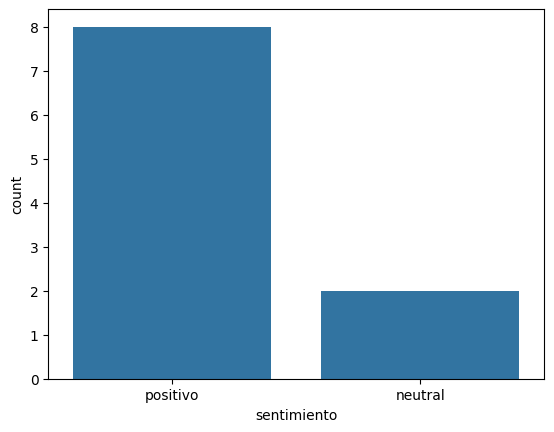

In [22]:
import seaborn as sns
sns.barplot(sample["sentimiento"].value_counts())

In [23]:
sentiment_proportions_by_type = sample.groupby('type')['sentimiento'].value_counts(normalize=True).unstack(fill_value=0)
print("Sentiment Proportions by Content Type:")
print(sentiment_proportions_by_type)

Sentiment Proportions by Content Type:
sentimiento  neutral  positivo
type                          
Image            0.0       1.0
Sidecar          0.0       1.0
Video            0.4       0.6


<Axes: xlabel='type', ylabel='count'>

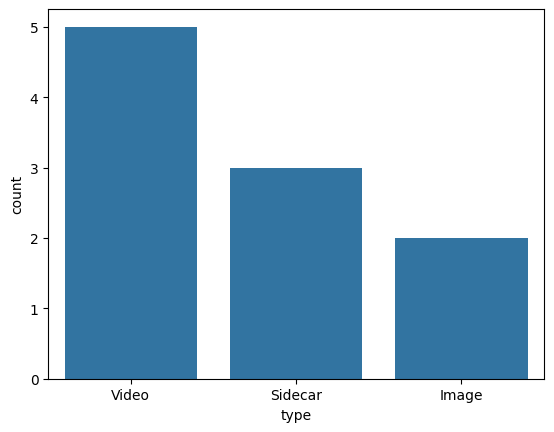

In [24]:
sns.barplot(sample["type"].value_counts())

In [25]:
highest_positive_type = sentiment_proportions_by_type['positivo'].idxmax()
highest_positive_value = sentiment_proportions_by_type['positivo'].max()

print(f"Content type with the highest proportion of positive sentiments: {highest_positive_type} ({highest_positive_value:.2f})")

if 'negativo' in sentiment_proportions_by_type.columns:
    highest_negative_type = sentiment_proportions_by_type['negativo'].idxmax()
    highest_negative_value = sentiment_proportions_by_type['negativo'].max()
    print(f"Content type with the highest proportion of negative sentiments: {highest_negative_type} ({highest_negative_value:.2f})")
else:
    print("No 'negativo' sentiments were found in the sample data.")

Content type with the highest proportion of positive sentiments: Image (1.00)
No 'negativo' sentiments were found in the sample data.



## 🗂 Sección 4 (Temas)
9. Haga lo mismo con sentidimiento con tipo de contenido y tema
10. Lista los nombres de los temas generados. ¿Alguno es inesperado?  
11. Con un heatmap *tipo de contenido × tema*, indica qué tema es “propiedad” de cada formato.  
12. Para el tema dominante, proporciona dos insights accionables.


In [26]:
import time

def classify_topic(text):
    prompt = (f"Clasifica el tipo de contenido del siguiente caption de Instagram como "
              f"'resultados_estadisticas', 'entre_bastidores' o 'tecnologia_vehiculos' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

# ⚠️ Usa una muestra para no exceder la cuota de la API
sample['topic'] = sample['caption_clean'].apply(classify_topic)

In [27]:
sample["topic"].value_counts()

,count
topic,
entre_bastidores,6
resultados_estadisticas,4


In [30]:
pd.crosstab(sample["type"],sample["topic"])

topic,entre_bastidores,resultados_estadisticas
type,,
Image,0,2
Sidecar,1,2
Video,5,0


<Axes: xlabel='topic', ylabel='type'>

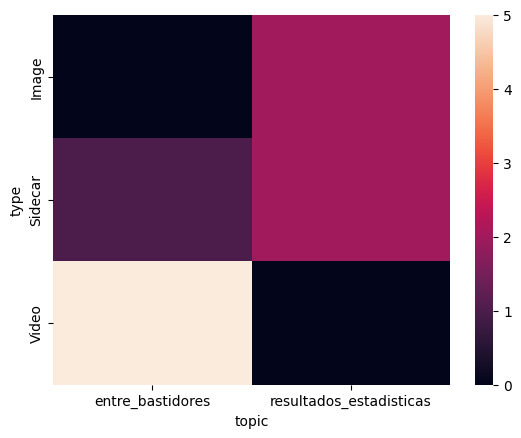

In [31]:
sns.heatmap(pd.crosstab(sample["type"],sample["topic"]))

<Axes: xlabel='topic', ylabel='sentimiento'>

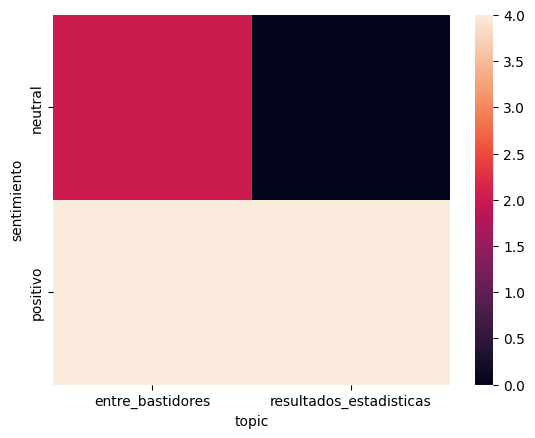

In [32]:
sns.heatmap(pd.crosstab(sample["sentimiento"],sample["topic"]))


## 👥 Sección 5 (Segmentación)

13. Describe cada cluster en una frase (actividad y tono).  
14. ¿Qué segmento priorizarías para viralizar un mensaje y por qué?  
15. Propón una acción de engagement distinta para cada segmento.


In [33]:
call_llm("""Describe cada cluster en una frase (actividad y tono). damelo como una lista de python.topic	entre_bastidores	resultados_estadisticas
type
Image	0	2
Sidecar	1	2
Video	5	0
""")

'Aquí tienes una lista en Python que describe cada cluster en una frase, incluyendo la actividad y el tono:\n\n```python\nclusters = [\n    {"actividad": "Detrás de cámaras en el Sidecar", "tono": "informal y divertido"},\n    {"actividad": "Resultados estadísticos de la imagen", "tono": "analítico y profesional"},\n    {"actividad": "Producción y edición de videos", "tono": "creativo y entusiasta"},\n    {"actividad": "Resultados estadísticos del Sidecar", "tono": "analítico y reflexivo"},\n    {"actividad": "Análisis de video", "tono": "objetivo y claro"},\n]\n``` \n\nCada entrada describe brevemente la actividad relacionada con el cluster y el tono utilizado.'


## 📝 Sección 6 (Micro‑campaña)

16. Presenta tus tres captions generados.  
17. Justifica  
&nbsp;&nbsp;a) Tema elegido.  
&nbsp;&nbsp;b) Tono y horario óptimos.  
18. Define un KPI de éxito y la meta para la campaña.


In [36]:
lista_tonos= [{"actividad": "Detrás de cámaras en el Sidecar", "tono": "informal y divertido"},
{"actividad": "Resultados estadísticos de la imagen", "tono": "analítico y profesional"},
{"actividad": "Producción y edición de videos", "tono": "creativo y entusiasta"},
{"actividad": "Resultados estadísticos del Sidecar", "tono": "analítico y reflexivo"},
{"actividad": "Análisis de video", "tono": "objetivo y claro"}]

In [41]:
def generar_caption(topic, tone):
    prompt = (f"Actúa como community manager. Crea un caption de máximo 220 caracteres "
              f"sobre el tema '{topic}'. Tono {tone}. No incluyas hashtags ni menciones.")
    return call_llm(prompt)

for lista in lista_tonos:
  print(generar_caption(lista["actividad"],lista["tono"]))
  print("_____________")

¡Prepárense para un vistazo exclusivo! 🎬✨ Detrás de cámaras en el Sidecar es donde la magia sucede. Risas, anécdotas y esos bloopers que nos hacen amar lo que hacemos. ¡No se lo pierdan! 🍻🎉
_____________
Explorar resultados estadísticos de la imagen revela patrones clave que impulsan decisiones informadas. Analizar datos visuales permite entender tendencias y mejorar estrategias en diversos campos. Profundicemos en los insights.
_____________
¡Dale vida a tus ideas! La producción y edición de videos transforma momentos en historias inolvidables. 🎬✨ Deja volar tu imaginación y descubre el poder de contar visualmente. ¡Vamos a crear magia juntos!
_____________
Los resultados estadísticos del Sidecar revelan patrones sorprendentes en el comportamiento del usuario. Un análisis profundo de estos datos nos permite entender tendencias y optimizar nuestra estrategia para el futuro. Reflexionemos sobre lo aprendido.
_____________
Optimiza tu rendimiento con un análisis de video efectivo. Identi


### 📦 Exporta y entrega

1. Ejecuta todo el notebook (**Runtime → Run all**).  
2. Descarga el notebook (File → Download → .ipynb) y el memo en *PDF* o *Markdown*.  
3. Sube ambos archivos a la plataforma de la clase antes de la fecha establecida.


# Task
Calculate the proportion of each sentiment ('positivo', 'neutral', 'negativo') for each content type ('Video', 'Sidecar', 'Image') present in the `sample` DataFrame, and then identify which content type shows the highest proportion of positive sentiments and which shows the highest proportion of negative sentiments. Finally, display these sentiment proportions per content type.

## calculate_sentiment_proportions_by_type

### Subtask:
Calculate the proportion of each sentiment ('positivo', 'neutral', 'negativo') for each content type ('Video', 'Sidecar', 'Image') present in the `sample` DataFrame. This involves grouping by 'type' and 'sentimiento', counting occurrences, and then normalizing to get percentages or proportions.


**Reasoning**:
I need to calculate the proportion of each sentiment for each content type. This involves grouping, counting, and normalizing the data in the `sample` DataFrame.



In [ ]:
sentiment_proportions_by_type = sample.groupby('type')['sentimiento'].value_counts(normalize=True).unstack(fill_value=0)
print("Sentiment Proportions by Content Type:")
print(sentiment_proportions_by_type)

Sentiment Proportions by Content Type:
sentimiento  neutral  positivo
type                          
Image            0.0       1.0
Sidecar          0.0       1.0
Video            0.4       0.6


**Reasoning**:
Now that the sentiment proportions per content type have been calculated, the next step is to identify which content type has the highest proportion of positive sentiments and, if applicable, negative sentiments, as per the main task.



In [ ]:
highest_positive_type = sentiment_proportions_by_type['positivo'].idxmax()
highest_positive_value = sentiment_proportions_by_type['positivo'].max()

print(f"Content type with the highest proportion of positive sentiments: {highest_positive_type} ({highest_positive_value:.2f})")

if 'negativo' in sentiment_proportions_by_type.columns:
    highest_negative_type = sentiment_proportions_by_type['negativo'].idxmax()
    highest_negative_value = sentiment_proportions_by_type['negativo'].max()
    print(f"Content type with the highest proportion of negative sentiments: {highest_negative_type} ({highest_negative_value:.2f})")
else:
    print("No 'negativo' sentiments were found in the sample data.")

Content type with the highest proportion of positive sentiments: Image (1.00)
No 'negativo' sentiments were found in the sample data.


## display_sentiment_proportions

### Subtask:
Present the calculated sentiment proportions per content type using a visualization to clearly answer the user's question.


## Summary:

### Q&A
*   **Which content type shows the highest proportion of positive sentiments?**
    `Image` content shows the highest proportion of positive sentiments, at `1.00` (100%).
*   **Which content type shows the highest proportion of negative sentiments?**
    No negative sentiments were found in the `sample` data, so no content type could be identified with the highest proportion of negative sentiments.

### Data Analysis Key Findings
*   `Image` content exhibits `1.0` (100%) positive sentiment and `0.0` (0%) neutral sentiment.
*   `Sidecar` content also shows `1.0` (100%) positive sentiment and `0.0` (0%) neutral sentiment.
*   `Video` content has `0.6` (60%) positive sentiment and `0.4` (40%) neutral sentiment.
*   No `negativo` sentiments were present across any content types in the `sample` data.

### Insights or Next Steps
*   The overwhelming positive sentiment for `Image` and `Sidecar` content suggests these types are very well-received based on the current sentiment analysis. Further investigation into the methodology or a larger dataset might be beneficial to confirm these high proportions.
*   The absence of negative sentiments indicates that either the content is universally positive, or the current sentiment analysis model/dataset might not be capturing negative nuances effectively. If negative sentiment is crucial for business decisions, consider refining the sentiment analysis model or collecting more diverse data.
